import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('nyc_building_sales.csv', index_col=0)

C:\Users\Alex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (17,18,20,22,23,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data['Borough'].value_counts()

Queens           15025
Brooklyn         10919
Manhattan         8474
Bronx             4145
Staten Island     4072
Name: Borough, dtype: int64

In [5]:
data.head(5)

,Borough,Block,Lot,SalePrice,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,ValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Queens,949,44,620000,401,317.00,1008,30,22,11370,E263,114,620,19-68 81 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A5,1,0,NaN,"SCAVETTA, SHEILA",1800,1224,0,1224,0,0,0,0,0,0,7,1,2,1,1,18.0,100.0,18,34,NaN,3,N,5,2,9438,28315,0,0,1945,E,0,0,NaN,NaN,0.68,0.9,0,2,4,4009490044,0,317,1014867,220289,9c,NaN,410 091,40701,NaN,0,NaN,1,15v1,506.535948
1,Queens,976,13,620000,401,317.00,2000,30,22,11370,E263,114,620,21-16 81 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A5,1,0,NaN,"PASQUA, BARBARA",1800,1836,0,1836,0,0,0,0,0,0,7,1,2,1,1,18.0,100.0,18,34,NaN,3,N,5,2,8141,27840,8141,20810,1950,E,0,0,NaN,NaN,1.02,0.9,0,2,4,4009760013,0,317,1014911,219972,9c,NaN,410 080,40701,NaN,0,NaN,1,15v1,337.690632
2,Queens,15828,53,273710,414,992.00,2018,27,31,11691,E265,101,3800,303 BEACH 38 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A1,1,0,NaN,FEDERAL NATIONAL MORT,3810,1200,0,1200,0,0,0,0,0,0,7,1,2,1,1,38.1,100.0,15,40,NaN,2,N,5,0,6660,12780,0,4896,2002,NaN,0,0,NaN,NaN,0.31,0.9,0,2,4,4158280053,0,992,1047920,156002,31a,NaN,408 052,46101,NaN,4158280049,12/2/2002,1,15v1,228.091667
3,Queens,15837,17,289000,414,972.04,2003,27,31,11691,E265,101,3800,334 BEACH 46 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A6,1,0,P,ROBERT RIVERS,3804,745,0,745,0,0,0,0,0,0,7,2,1,1,1,40.0,95.1,20,30,G,1,N,5,0,3957,6966,3957,6966,1925,E,0,0,NaN,NaN,0.20,0.9,0,2,4,4158370017,0,97204,1046175,155958,31a,NaN,408 050,46101,NaN,0,NaN,1,15v1,387.919463
4,Queens,15837,17,69000,414,972.04,2003,27,31,11691,E265,101,3800,334 BEACH 46 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A6,1,0,P,ROBERT RIVERS,3804,745,0,745,0,0,0,0,0,0,7,2,1,1,1,40.0,95.1,20,30,G,1,N,5,0,3957,6966,3957,6966,1925,E,0,0,NaN,NaN,0.20,0.9,0,2,4,4158370017,0,97204,1046175,155958,31a,NaN,408 050,46101,NaN,0,NaN,1,15v1,92.617450


In [6]:
%matplotlib inline

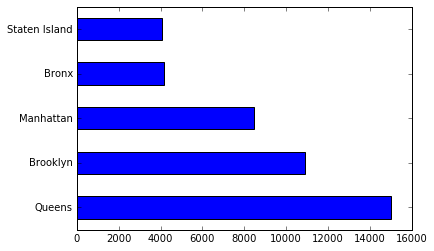

In [7]:
data['Borough'].value_counts().plot(kind='barh')

The difference between the number of buildings sold in Queens and the number sold in Brooklyn is surprising.

In [8]:
data.groupby('Borough')

In [9]:
help(pd.groupby)

Help on function groupby in module pandas.core.groupby:

groupby(obj, by, **kwds)
    Class for grouping and aggregating relational data. See aggregate,
    transform, and apply functions on this object.
    
    It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
    
    ::
    
        grouped = groupby(obj, ...)
    
    Parameters
    ----------
    obj : pandas object
    axis : int, default 0
    level : int, default None
        Level of MultiIndex
    groupings : list of Grouping objects
        Most users should ignore this
    exclusions : array-like, optional
        List of columns to exclude
    name : string
        Most users should ignore this
    
    Notes
    -----
    After grouping, see aggregate, apply, and transform functions. Here are
    some other brief notes about usage. When grouping by multiple groups, the
    result index will be a MultiIndex (hierarchical) by default.
    
    Iteration produces (key, group) tuples, i.e. chunking th

In [10]:
import missingno as msno

In [11]:
import matplotlib.pyplot as plt

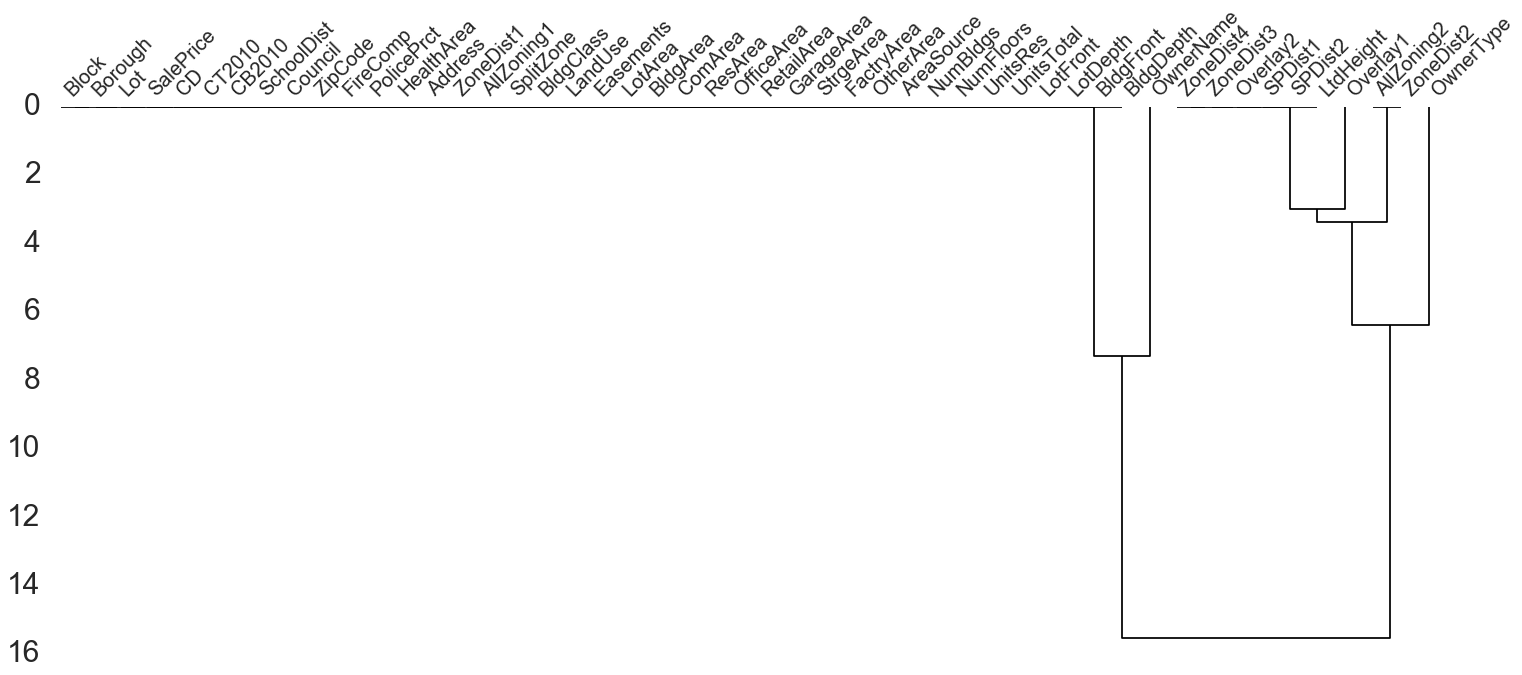

In [12]:
mat = msno.dendrogram(data.ix[1:250, 0:50], inline=False)
mat.axes[0].tick_params(axis='y', labelsize=30)

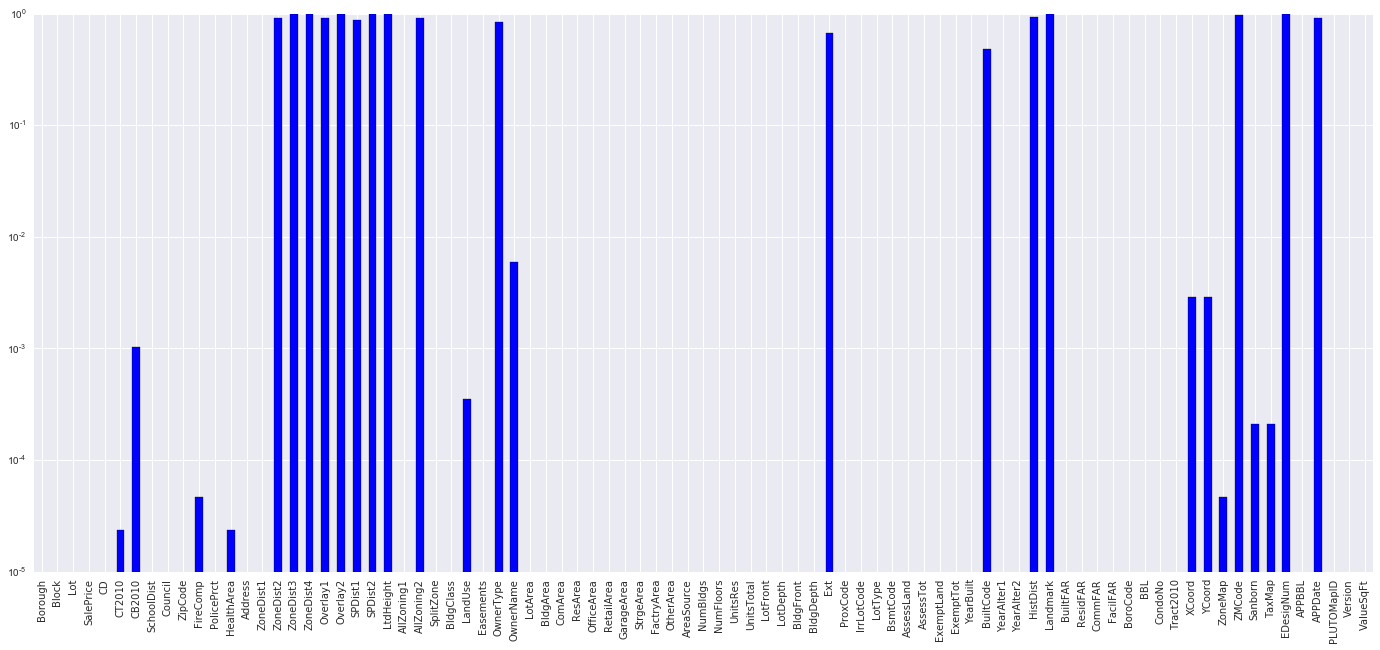

In [13]:
(data.isnull().sum() / len(data)).plot(kind='bar', figsize=(24, 10), logy=True)

`apply` can return not only singulars but also `Series`!

In [14]:
data.ix[:, ['Block', 'Lot']].apply(lambda x: pd.Series([x.min(), x.max()]))

,Block,Lot
0,1,1
1,16322,7515


Using `idxmax` to find the lot in the record with the highest block number.

In [19]:
data.iloc[data['Block'].idxmax()]

Borough                     Queens
Block                        16322
Lot                             20
SalePrice                 1.75e+06
CD                             414
CT2010                         922
CB2010                        3016
SchoolDist                      27
Council                         32
ZipCode                      11694
FireComp                      E329
PolicePrct                     100
HealthArea                    3700
Address       171 BEACH 148 STREET
ZoneDist1                     R1-2
ZoneDist2                      NaN
ZoneDist3                      NaN
ZoneDist4                      NaN
Overlay1                       NaN
Overlay2                       NaN
SPDist1                        NaN
SPDist2                        NaN
LtdHeight                      NaN
AllZoning1                    R1-2
AllZoning2                     NaN
SplitZone                        N
BldgClass                       A2
LandUse                          1
Easements           

In [25]:
data = data.sort_values(by = 'SalePrice', ascending=False)

In [28]:
data.tail(5)[::-1]

,Borough,Block,Lot,SalePrice,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,ValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32651,Brooklyn,1642,55,1700,303,385,2001,16,36,11221,E214,81,3000,727 MADISON STREET,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6B,NaN,N,B3,1,0,NaN,727 MADISON ST LLC,1667,2001,0,2001,0,0,0,0,0,0,7,1,2,2,2,16.67,100.00,16.67,40,NaN,3,N,5,1,11220,14230,0,0,1899,E,0,0,NaN,NaN,1.20,2.00,0,2.0,3,3016420055,0,385,1004325,189794,17a,NaN,305 023,30605,NaN,0,NaN,1,15v1,0.849575
42242,Brooklyn,723,12,1908,307,82,3002,15,38,11232,E201,72,6600,314 42 STREET,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6B,NaN,N,I5,8,0,NaN,TMS ENTERPRISES LP,10016,18752,18752,0,0,0,0,0,0,18752,7,1,1,0,1,50.00,200.33,50.00,200,NaN,0,N,3,2,101250,2304900,0,0,1992,NaN,0,0,NaN,NaN,1.87,2.00,0,2.0,3,3007230012,0,82,981506,176702,16b,NaN,306A021,30303,NaN,3007230012,12/30/1999,1,15v1,0.101749
16465,Bronx,3263,67,2187,208,279,5000,10,11,10463,L046,50,310,3915 ORLOFF AVENUE,R7-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-1,NaN,N,D4,3,0,P,PARK RES HOUSING CP,40250,115000,0,115000,0,0,0,0,0,0,7,1,13,104,104,398.28,105.19,186.00,67,NaN,0,Y,3,2,209250,1440000,209250,1440000,1957,NaN,0,0,NaN,NaN,2.86,3.44,0,4.8,2,2032630067,0,279,1013655,261363,1d,NaN,213 040,21201,NaN,0,NaN,1,15v1,0.019017
16438,Bronx,3252,209,2450,208,281,1000,10,11,10463,L046,50,310,80 GOUVERNEUR AVENUE,R7-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-1,NaN,N,D4,3,0,X,AMALGAMATED HOUSING C,54500,197406,0,197406,0,0,0,0,0,0,7,1,7,207,207,318.00,208.42,208.00,308,NaN,0,Y,3,2,283950,3016800,283950,3016800,1930,NaN,0,0,NaN,NaN,3.62,3.44,0,4.8,2,2032520209,0,281,1014481,261539,1d,NaN,213 041,21201,NaN,0,NaN,1,15v1,0.012411
32650,Brooklyn,1642,55,2500,303,385,2001,16,36,11221,E214,81,3000,727 MADISON STREET,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6B,NaN,N,B3,1,0,NaN,727 MADISON ST LLC,1667,2001,0,2001,0,0,0,0,0,0,7,1,2,2,2,16.67,100.00,16.67,40,NaN,3,N,5,1,11220,14230,0,0,1899,E,0,0,NaN,NaN,1.20,2.00,0,2.0,3,3016420055,0,385,1004325,189794,17a,NaN,305 023,30605,NaN,0,NaN,1,15v1,1.249375


Actually 727 Madison Street appears to be [a million-dollar home](http://www.trulia.com/homes/New_York/Brooklyn/sold/20825809-727-Madison-St-Brooklyn-NY-11221). This sales price is completely unrealistic! However, notice also that there is a huge gap between the 1000-dollar lower limit we hardcoded in earlier and this sales price&mdash;so at least all of the one-dollar transfers have been covered. Still, I don't see any easy way of removing these remaining outliers.

In [29]:
data.head(5)

,Borough,Block,Lot,SalePrice,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,ValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25616,Manhattan,972,1,4111111766,106,44.00,5005,2,4,10009,E005,13,6000,240 1 AVENUE,R7-2,C1-7,NaN,NaN,C1-5,NaN,NaN,NaN,NaN,C1-5/R7-2,C1-7,Y,D7,4,0,P,ST-DIL LLC,2675000,8942176,574234,8367942,16820,77414,480000,0,0,0,7,36,13,8756,8800,1362.00,2023.00,1362.00,2023.00,NaN,0,Y,3,5,117450000,569465100,0,0,1945,NaN,0,0,NaN,NaN,3.34,3.44,0,6.5,1,1009720001,0,44,990376,205864,12c,NaN,102 040,10310,NaN,0,NaN,1,15v1,459.744000
26923,Manhattan,1004,20,1932900000,105,131.00,1002,2,4,10019,E023,18,4700,787 7 AVENUE,C6-6,C6-6.5,NaN,NaN,NaN,NaN,MID,NaN,NaN,C6-6/MID,C6-6.5,Y,O4,5,0,NaN,"787 HOLDINGS, LLC",80333,1638637,1633544,5093,1553937,49000,27016,2591,0,1000,7,1,51,0,48,200.83,400.00,201.00,400.00,NaN,2,N,3,2,123750000,337494600,0,0,1985,NaN,0,0,NaN,NaN,20.40,10.00,15,15.0,1,1010040020,0,131,989293,216783,8c,NaN,105N060,10401,NaN,1010040029,12/11/1986,1,15v1,1179.577905
26932,Manhattan,1272,39,1775000000,105,112.01,1003,2,4,10019,E023,18,4800,730 5 AVENUE,C5-3,C5-P,NaN,NaN,NaN,NaN,MID,NaN,NaN,C5-3/MID,C5-P,Y,O3,5,0,P,"730 FIFTH RETAIL, LLC",26300,348580,348580,0,327260,21300,0,10,0,10,7,1,25,0,75,100.42,225.00,100.00,225.00,NaN,2,Y,3,2,51750000,138181050,0,0,1921,NaN,1986,0,NaN,NaN,13.25,10.00,15,15.0,1,1012720039,0,11201,991323,217212,8c,NaN,106W034,10502,NaN,0,NaN,1,15v1,5092.087899
25617,Manhattan,978,1,1345485019,106,60.00,1003,2,4,10010,E005,13,6000,342 1 AVENUE,R7-2,C1-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-2,C1-7,Y,D6,4,0,P,PCV ST-DIL LLC,828650,3122165,19609,3102556,3419,16190,0,0,0,0,7,21,15,2491,2498,650.00,547.42,71.50,182.42,NaN,0,Y,5,5,32941350,165433050,0,0,1947,NaN,0,0,NaN,NaN,3.77,3.44,0,6.5,1,1009780001,0,60,990629,207012,12c,NaN,102 050,10310,NaN,0,NaN,1,15v1,430.946160
25993,Manhattan,1306,23,510000000,106,100.00,2004,2,4,10022,E008,17,4800,575 LEXINGTON AVENUE,C6-6,C6-4.5,NaN,NaN,NaN,NaN,MID,NaN,NaN,C6-6/MID,C6-4.5,Y,O4,5,0,P,MAPLE REEP - OFC 575,32625,624883,624883,0,564429,20000,34847,5607,0,0,7,1,34,0,38,150.42,225.00,150.42,225.00,NaN,0,Y,3,2,18720000,76611600,0,0,1958,NaN,1990,2012,NaN,NaN,19.15,10.00,15,15.0,1,1013060023,0,100,992209,215143,8d,NaN,104 050,10504,NaN,0,NaN,1,15v1,816.152784


In [15]:
data['XCoord'].corrwith(data['YCoord'])

AttributeError: 'Series' object has no attribute 'corrwith'